# Lab Segmentation 2


In [202]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
def getThreshold(image, greyScaleSize=256):
    imageSize = image.shape[0] * image.shape[1]
    hist = np.zeros(greyScaleSize)

    # 1- Convert the image to Unit8.
    image = (image * 255).astype("uint8")
    
    # 2- Get counts array that contains the number of pixels in each grey-level.
    unique, unique_counts = np.unique(image, return_counts=True)
    hist[unique] = unique_counts
    
    # hist = (histogram(image, nbins=greyScaleSize)[1]).astype(np.uint8)
    
    # 3- Get initial threshold by getting the average mean of the pixels’ grey-level
    greylevels = np.arange(hist.shape[0])
    Tinit = round(np.sum(hist * greylevels) / imageSize)

    # 4- Get the two weighted averages (means), one for the lower pixels (have gray level
    # less than Tinit) and the other for the higher pixels (have gray level more than Tinit).
    prevTinit = 0
    while not (Tinit == prevTinit):
        Mean1 = round(np.sum(hist[:Tinit] * greylevels[:Tinit]) / imageSize)
        Mean2 = round(np.sum(hist[Tinit:] * greylevels[Tinit:]) / imageSize)
        prevTinit = Tinit
        Tinit = (Mean1 + Mean2) // 2

    print("final Threshold", Tinit)
    return Tinit


def Threshold(image, greyScaleSize=256):
    original = np.copy(image)
    Threshold = getThreshold(image, greyScaleSize)
    image[image > Threshold] = 255
    image[image <= Threshold] = 0
    show_images(images=[original, image], titles=["Original Image", "Thresholed Image"])


def Threshold2(image, greyScaleSize=256):
    original = np.copy(image)
    Threshold = getThreshold(image, greyScaleSize) / (greyScaleSize - 1)
    image[image > Threshold] = 1
    image[image <= Threshold] = 0
    show_images(images=[original, image], titles=["Original Image", "Thresholed Image"])

final Threshold 68


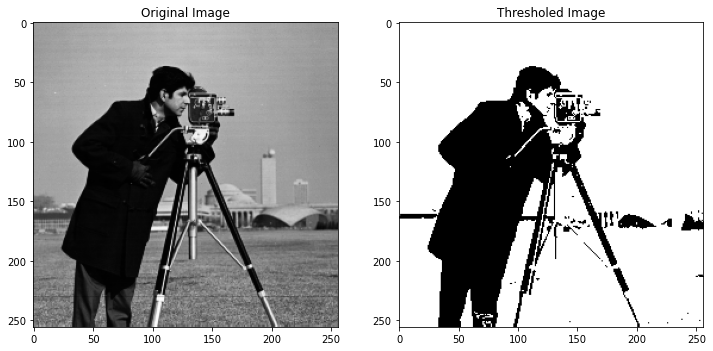

final Threshold 82


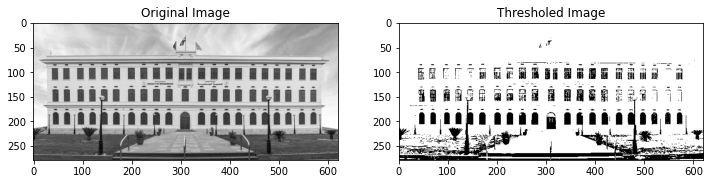

final Threshold 78


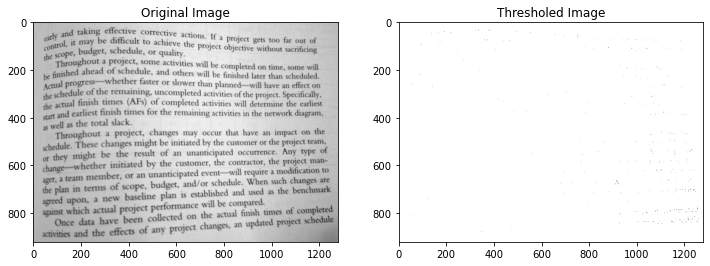

final Threshold 64


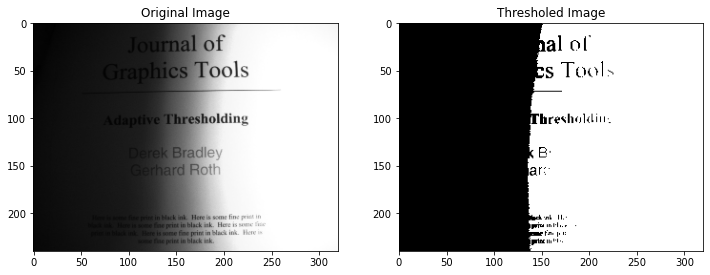

In [208]:
cameraman_image = io.imread("./cameraman.png")
Threshold(cameraman_image)

cufe_image = rgb2gray(io.imread("./cufe.png"))
Threshold2(cufe_image)

book1_image = rgb2gray(io.imread("./book1.png"))
Threshold2(book1_image)

book_image = io.imread("./book.png")
Threshold(book_image)

In [205]:
image = (io.imread("./cameraman.png") * 255).astype("uint8")
size = image.shape[0] * image.shape[1]
hist = np.zeros(256)
print(image.shape, size)
unique, unique_counts = np.unique(image, return_counts=True)
hist[unique] = unique_counts
print(hist.shape[0])

T = 0
prevT = 0
for i in range(0, hist.shape[0]):
    T += i * hist[i]
T = round(T / size)

while T != prevT:
    M1 = 0
    M2 = 0
    for i in range(0, T):
        M1 += i * hist[i]
    M1 = round(M1 / size)
    for i in range(T, hist.shape[0]):
        M2 += i * hist[i]
    M2 = round(M2 / size)
    prevT = T
    T = (M1 + M2) // 2

print(T)

(256, 256) 65536
256
68


(256,)
(256,)
final Threshold 64
(256,)
(256,)
final Threshold 114
(256,)
(256,)
final Threshold 16
(256,)
(256,)
final Threshold 112
(256,)
(256,)
final Threshold 13


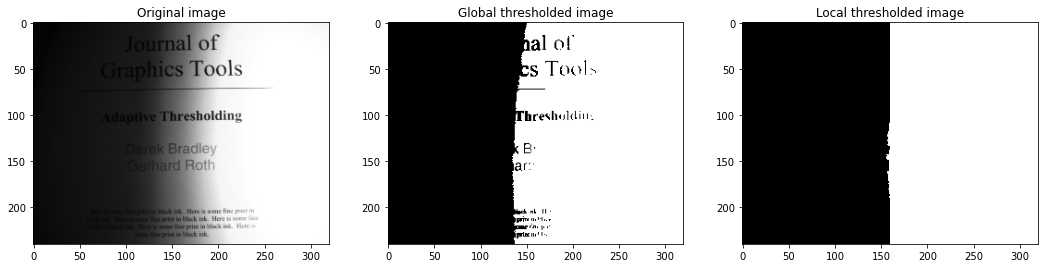

In [206]:
# Experiment 2
def get_thresholded_image(image):
    thresholded_image = np.copy(image)
    Threshold = getThreshold(image)
    thresholded_image[thresholded_image >= Threshold] = 255
    thresholded_image[thresholded_image < Threshold] = 0
    return thresholded_image


img = io.imread("book.png")
img_parts = [
    img[0 : img.shape[0] // 2, 0 : img.shape[1] // 2],
    img[0 : img.shape[0] // 2, img.shape[1] // 2 : img.shape[1]],
    img[img.shape[0] // 2 : img.shape[0], 0 : img.shape[1] // 2],
    img[img.shape[0] // 2 : img.shape[0], img.shape[1] // 2 : img.shape[1]],
]

# size = 0
# for i in range (0, 4):
#        size += img_parts[i].shape[0] * img_parts[i].shape[1]
# print(size)
# print(img.shape[0] * img.shape[1])

global_thresholded_image = get_thresholded_image(img)


img_parts_thresholded = []
for i in range(0, 4):
    img_parts_thresholded.append(get_thresholded_image(img_parts[i]))

thresholded_img_horizontal_parts = [
    np.concatenate((img_parts_thresholded[0], img_parts_thresholded[1]), axis=1),
    np.concatenate((img_parts_thresholded[2], img_parts_thresholded[3]), axis=1),
]

local_thresholded_img = np.concatenate(
    (thresholded_img_horizontal_parts[0], thresholded_img_horizontal_parts[1]), axis=0
)

# print(thresholded_img.shape[0] * thresholded_img.shape[1])

show_images(
    images=[img, global_thresholded_image, local_thresholded_img],
    titles=["Original image", "Global thresholded image", "Local thresholded image"],
)